In [13]:
import pandas as pd
df = pd.read_csv("Assessment-2-Associate-DS(in).csv")
df.rename(columns={'SerailNum': 'SerialNum'}, inplace=True)
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True, errors='coerce')
df.dropna(subset=['weekend_date'], inplace=True)

In [14]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   weekend_date  494 non-null    datetime64[ns]
 1   channel       494 non-null    object        
 2   brand         494 non-null    object        
 3   category      494 non-null    object        
 4   sub_category  494 non-null    object        
 5   SerialNum     494 non-null    int64         
 6   quantity      494 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 30.9+ KB
None
                        weekend_date   SerialNum     quantity
count                            494  494.000000   494.000000
mean   2023-08-29 00:46:38.380566784    3.058704   493.722672
min              2022-05-28 00:00:00    1.000000     1.000000
25%              2023-03-12 18:00:00    2.000000   115.250000
50%              2023-09-09 00:00:00    4.000000   216.500000
75% 

In [12]:
print("Unique SerialNum:", df['SerialNum'].nunique())
print("Unique Channels:", df['channel'].unique())
print("Date Range:", df['weekend_date'].min(), "to", df['weekend_date'].max())

weekly_df = df.groupby('weekend_date')['quantity'].sum().sort_index()
weekly_df = weekly_df.asfreq('W')



Unique SerialNum: 4
Unique Channels: ['Channel2' 'Channel1']
Date Range: 2022-05-28 00:00:00 to 2024-08-31 00:00:00


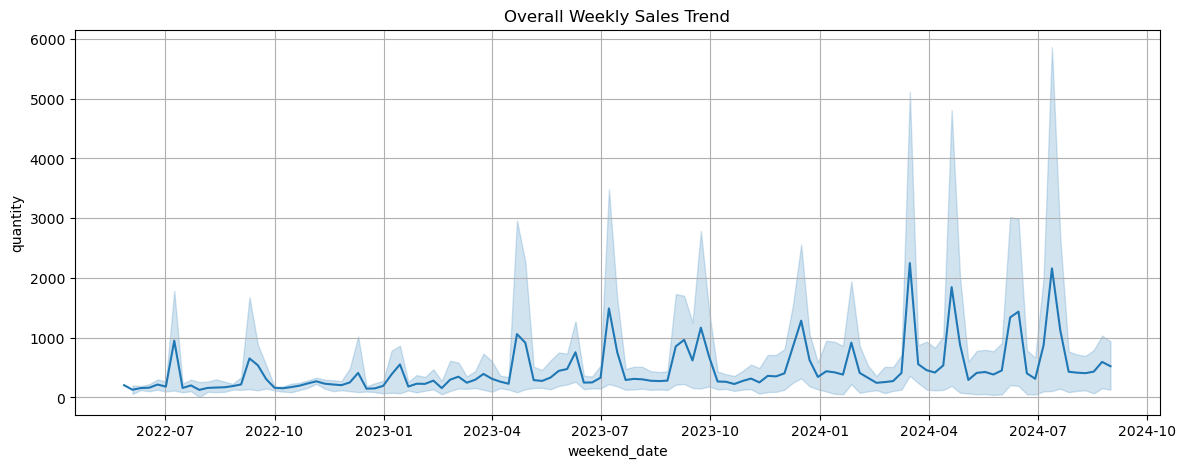

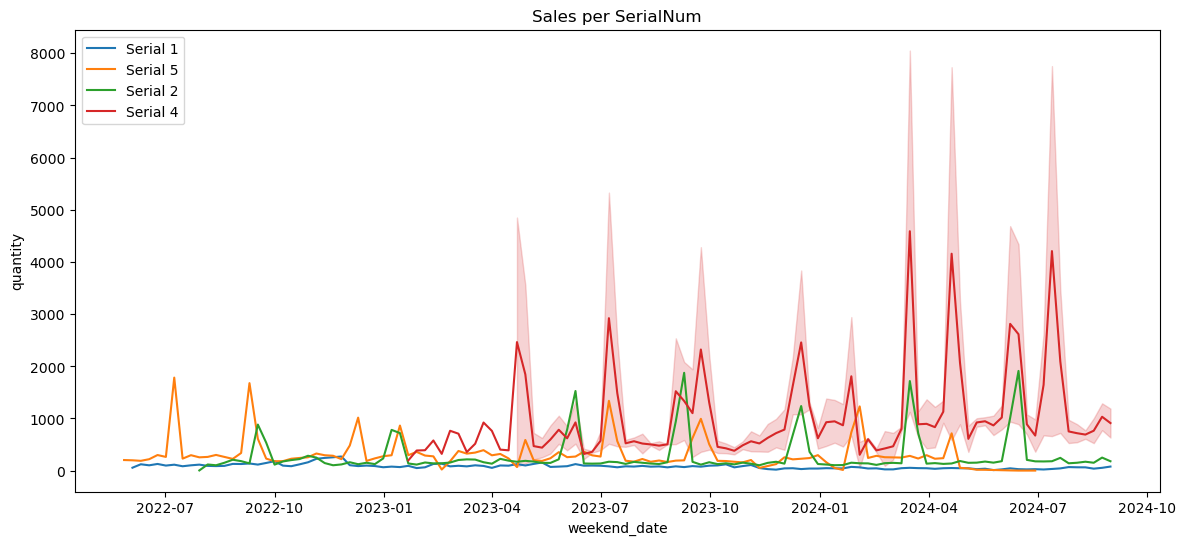

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='weekend_date', y='quantity')
plt.title("Overall Weekly Sales Trend")
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for serial in df['SerialNum'].unique():
    sns.lineplot(data=df[df['SerialNum'] == serial], x='weekend_date', y='quantity', label=f"Serial {serial}")
plt.title("Sales per SerialNum")
plt.legend()
plt.show()


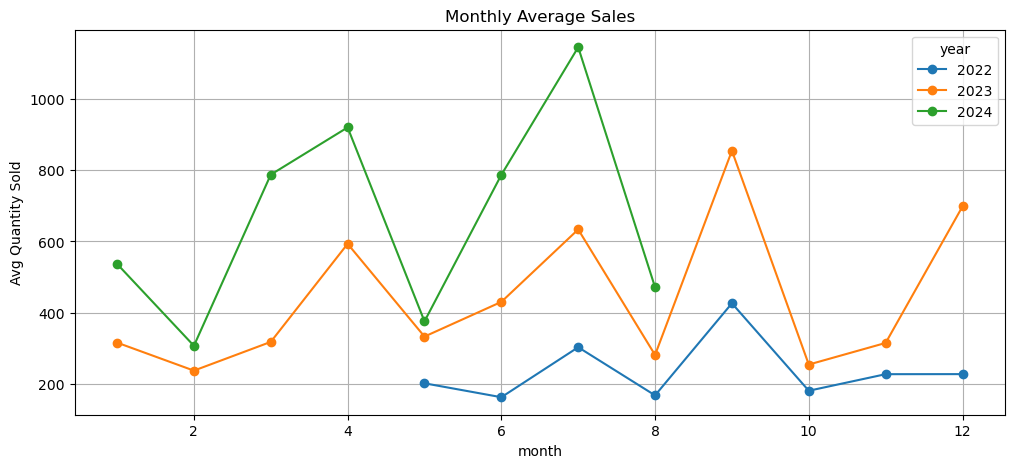

In [16]:
df['month'] = df['weekend_date'].dt.month
df['year'] = df['weekend_date'].dt.year

monthly_avg = df.groupby(['year', 'month'])['quantity'].mean().unstack()
monthly_avg.T.plot(marker='o', figsize=(12, 5))
plt.title("Monthly Average Sales")
plt.ylabel("Avg Quantity Sold")
plt.grid(True)
plt.show()


## 🔍 EDA Summary
- Weekly sales data spans from May 2022 to August 2024.
- There are 5 unique products (`SerialNum`), with consistent weekly entries.
- Sales show seasonal peaks mid-year and year-end.
- No missing or corrupted dates after cleaning.
